# MATH 210 Introduction to Mathematical Computing

## October 10, 2019

* Arc length
* Taylor polynomials

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## Arc length

Wrtite a function called `arc_length` which takes input paramters `f`, `a`, `b`, `h` and `N` and returns approximation of the arc length

$$
\int_a^b \sqrt{1 + f'(x)^2} dx
$$

using the trapezoid rule with $N$ subintervals and central difference approximation of $f'(x)$ using sterp size $h$.

In [13]:
def arc_length(f,a,b,h,N):
    x = np.linspace(a,b,N+1)
    df = (f(x+h) - f(x-h))/(2*h)
    y = np.sqrt(1 + df**2)
    I = np.trapz(y,x)
    return I

Let's verify our function on $f(x) = 1$ for $x \in [0,1]$. The arc length is 1.

In [14]:
f = lambda x: np.ones(x.shape)
arc_length(f,0,1,0.001,10)

1.0

Let's try the arc length of a quarter circle of radius 1.

In [15]:
f = lambda x: np.sqrt(1-x**2)
arc_length(f,-1/np.sqrt(2),1/np.sqrt(2),0.001,1000)

1.5707973267996307

Compare to $\pi/2$.

In [16]:
np.pi/2

1.5707963267948966

## Taylor polynomials

Write a function called `taylor2` which takes input parameters `f`, `a`,  and `h` and returns the coefficients of the 2nd order Taylor polynomial of $f$ at $x=a$:

$$
T_2(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2}(x-a)^2
$$

as a 1D NumPy array using central difference formula with step size $h$.

In [17]:
def taylor2(f,a,h):
    fa = f(a)
    dfa = (f(a+h) - f(a-h))/(2*h)
    d2fa = (f(a+h) - 2*fa + f(a-h))/h**2
    c0 = fa - a*dfa + d2fa*a**2/2
    c1 = dfa - a*d2fa
    c2 = d2fa/2
    return np.array([c0,c1,c2])

In [18]:
taylor2(lambda x: x**2,0,0.001)

array([0., 0., 1.])

In [19]:
taylor2(lambda x: x**3,0,0.0001)

array([0.e+00, 1.e-08, 0.e+00])

In [20]:
c = taylor2(lambda x: np.cos(x),0,0.0001)

In [21]:
c

array([ 1. ,  0. , -0.5])

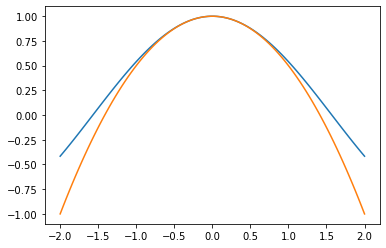

In [22]:
x = np.linspace(-2,2,100)
y = np.cos(x)
T = c[0] + c[1]*x + c[2]*x**2
plt.plot(x,y,x,T)
plt.show()